# *Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama -Miuul-*

Dosya yükleme

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving persona.csv to persona.csv


In [ ]:
import io
data = io.BytesIO(uploaded['persona.csv'])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
df = pd.read_csv(data)

Veriye genel bakış

Veri setimizde 5000 gözlem birimi ve 5 değişken mevcuttur."price" ve "age" değişkeni nicel değişkenler. "source", "sex" ve "country" ise kategorik değişkenlerdir. "source" değiskeninde "android" ve "ios" olmak üzere 2 unique deger vardır.

In [ ]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [ ]:
df.shape

(5000, 5)

In [ ]:
df.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [ ]:
df.dtypes

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object

In [ ]:
df["SOURCE"].unique()

array(['android', 'ios'], dtype=object)

In [ ]:
df["SOURCE"].value_counts()



android    2974
ios        2026
Name: SOURCE, dtype: int64

In [ ]:
df["PRICE"].unique()

array([39, 49, 29, 19, 59,  9])

In [ ]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

In [ ]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

In [ ]:
df.groupby(["COUNTRY"])["PRICE"].mean()

COUNTRY
bra    34.327540
can    33.608696
deu    34.032967
fra    33.587459
tur    34.787140
usa    34.007264
Name: PRICE, dtype: float64

In [ ]:
df.groupby(["COUNTRY"])["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [ ]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [ ]:
df.groupby(["SOURCE"])["PRICE"].mean()

SOURCE
android    34.174849
ios        34.069102
Name: PRICE, dtype: float64

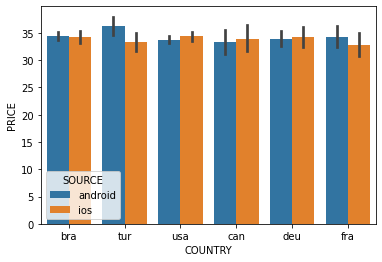

In [ ]:
sns.barplot(x = "COUNTRY", y = "PRICE", hue = "SOURCE", data = df);

In [ ]:
df.groupby(["COUNTRY","SOURCE"])["PRICE"].mean()

COUNTRY  SOURCE 
bra      android    34.387029
         ios        34.222222
can      android    33.330709
         ios        33.951456
deu      android    33.869888
         ios        34.268817
fra      android    34.312500
         ios        32.776224
tur      android    36.229437
         ios        33.272727
usa      android    33.760357
         ios        34.371703
Name: PRICE, dtype: float64

In [ ]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"])[["PRICE"]].mean()

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

In [ ]:
agg_df= df.groupby(["COUNTRY","SOURCE","SEX","AGE"])["PRICE"].mean().sort_values(ascending=False)
print(agg_df)

COUNTRY  SOURCE   SEX     AGE
bra      android  male    46     59.0
usa      android  male    36     59.0
fra      android  female  24     59.0
usa      ios      male    32     54.0
deu      android  female  36     49.0
                                 ... 
usa      ios      female  38     19.0
                          30     19.0
can      android  female  27     19.0
fra      android  male    18     19.0
deu      android  male    26      9.0
Name: PRICE, Length: 348, dtype: float64


In [ ]:
new=df["new_age"] = pd.cut(df["AGE"], [0, 18, 23, 30, 40, 70])

In [ ]:
df.tail(5)

,PRICE,SOURCE,SEX,COUNTRY,AGE,new_age
4995,29,android,female,bra,31,"(30, 40]"
4996,29,android,female,bra,31,"(30, 40]"
4997,29,android,female,bra,31,"(30, 40]"
4998,39,android,female,bra,31,"(30, 40]"
4999,29,android,female,bra,31,"(30, 40]"


Sınıflandırma ve yeni gelecek gözlem biriminin hangi sınıfa ait oldugunu bulma.

Sürekli olan yaş değişkenini kategorik hale bir önceki adımda getirdik.Tek sürekli değişken olarak fiyat değişkenimiz kaldı. groupby komutu ile "country", "source", "sex" ve kategorik hale getirdiğimiz "new_age" değişkenlerinin kırılımında "price" değişkeninin ortalamasını alıyoruz.Fiyat haricindeki diğer 
değişkenlermizi "customer_based_level" olarak tek bir değişkenmiş gibi birlestiriyoruz.Pandas kütüphanesindeki qcut fonksiyonu ile ortalaması alınmıs fiyat değişkenini kullanarak 4 sınıfa ayırıyoruz.Ve yeni gelen bir gözlem değerini elimizdeki sınıflandırılmıs veriyi kullanarak hangi sınıfa ait olduğunu buluyoruz.


In [ ]:
df.groupby(["COUNTRY","SOURCE","SEX","new_age"]).agg({"PRICE": ["mean"]})

PRICE
                                      mean
COUNTRY SOURCE  SEX    new_age            
bra     android female (0, 18]   35.439394
                       (18, 23]  34.114943
                       (23, 30]  34.540541
                       (30, 40]  34.696203
                       (40, 70]  35.086957
...                                    ...
usa     ios     male   (0, 18]   34.054348
                       (18, 23]  35.304348
                       (23, 30]  36.096774
                       (30, 40]  32.333333
                       (40, 70]  35.842105

[120 rows x 1 columns]

In [ ]:
agg_df=agg_df.reset_index()


    COUNTRY   SOURCE     SEX  AGE  PRICE
0       bra  android    male   46   59.0
1       usa  android    male   36   59.0
2       fra  android  female   24   59.0
3       usa      ios    male   32   54.0
4       deu  android  female   36   49.0
..      ...      ...     ...  ...    ...
343     usa      ios  female   38   19.0
344     usa      ios  female   30   19.0
345     can  android  female   27   19.0
346     fra  android    male   18   19.0
347     deu  android    male   26    9.0

[348 rows x 5 columns]


In [ ]:
new=new.reset_index()
print(new)

      index       AGE
0         0   (0, 18]
1         1   (0, 18]
2         2   (0, 18]
3         3   (0, 18]
4         4   (0, 18]
...     ...       ...
4995   4995  (30, 40]
4996   4996  (30, 40]
4997   4997  (30, 40]
4998   4998  (30, 40]
4999   4999  (30, 40]

[5000 rows x 2 columns]


In [ ]:

agg_df['AGE_CAT']=pd.cut(agg_df.AGE,bins=[0,18,23,30,40,46,52,58,64,70],
                         labels=['0_18','19_23','24_30','31_40','41_46','47_52','53_58','59_64','65_70'])
print(agg_df)

    COUNTRY   SOURCE     SEX  AGE  PRICE AGE_CAT
0       bra  android    male   46   59.0   41_46
1       usa  android    male   36   59.0   31_40
2       fra  android  female   24   59.0   24_30
3       usa      ios    male   32   54.0   31_40
4       deu  android  female   36   49.0   31_40
..      ...      ...     ...  ...    ...     ...
343     usa      ios  female   38   19.0   31_40
344     usa      ios  female   30   19.0   24_30
345     can  android  female   27   19.0   24_30
346     fra  android    male   18   19.0    0_18
347     deu  android    male   26    9.0   24_30

[348 rows x 6 columns]


In [ ]:
agg_df['customers_level_based']=(agg_df['COUNTRY']+"_"+agg_df['SOURCE']+"_"+agg_df['SEX']+"_"+(agg_df['AGE_CAT'].astype('object')))
agg_df['customers_level_based']=agg_df['customers_level_based'].str.upper()
agg_df.groupby('customers_level_based')['PRICE'].mean()

customers_level_based
BRA_ANDROID_FEMALE_0_18     35.645303
BRA_ANDROID_FEMALE_19_23    34.077340
BRA_ANDROID_FEMALE_24_30    33.863946
BRA_ANDROID_FEMALE_31_40    34.898326
BRA_ANDROID_FEMALE_41_46    36.649573
                              ...    
USA_IOS_MALE_31_40          36.206324
USA_IOS_MALE_41_46          30.250000
USA_IOS_MALE_47_52          39.000000
USA_IOS_MALE_53_58          31.500000
USA_IOS_MALE_59_64          46.500000
Name: PRICE, Length: 129, dtype: float64

In [ ]:
agg_df['SEGMENT']=pd.qcut(agg_df['PRICE'],4,labels=['D','C','B','A'])
print(agg_df['SEGMENT'])

0      A
1      A
2      A
3      A
4      A
      ..
343    D
344    D
345    D
346    D
347    D
Name: SEGMENT, Length: 348, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']


In [ ]:
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
208,fra,ios,female,40,33.000000,31_40,FRA_IOS_FEMALE_31_40,C
221,fra,ios,female,31,32.636364,31_40,FRA_IOS_FEMALE_31_40,C
